<a href="https://colab.research.google.com/github/KeerthanaShivarathiri/Infosysspringboard_week1/blob/main/DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUSTOMER SUPPORT TICKET WEEK 1 ASSIGNMENT**

Customer IT Support - Ticket Dataset

In [13]:
import pandas as pd
df=pd.read_csv("helpdesk_customer_tickets.csv")


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             600 non-null    int64  
 1   subject        599 non-null    object 
 2   body           600 non-null    object 
 3   answer         600 non-null    object 
 4   type           600 non-null    object 
 5   queue          600 non-null    object 
 6   priority       600 non-null    object 
 7   language       600 non-null    object 
 8   business_type  600 non-null    object 
 9   tag_1          600 non-null    object 
 10  tag_2          600 non-null    object 
 11  tag_3          600 non-null    object 
 12  tag_4          600 non-null    object 
 13  tag_5          432 non-null    object 
 14  tag_6          173 non-null    object 
 15  tag_7          56 non-null     object 
 16  tag_8          9 non-null      object 
 17  tag_9          0 non-null      float64
dtypes: float64

In [15]:
df.isnull().sum()

,0
id,0
subject,1
body,0
answer,0
type,0
queue,0
priority,0
language,0
business_type,0
tag_1,0


In [16]:
df.describe(include='all')

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
count,600.000000,599,600,600,600,600,600,600,600,600,600,600,600,432,173,56,9,0.0
unique,NaN,599,600,600,4,10,3,5,4,20,30,40,40,43,28,20,8,NaN
top,NaN,Anfrage zu den Spezifikationen und Anpassungso...,Sehr geehrtes Support-Team des Tech Online Sto...,"Sehr geehrter <name>,\n\nvielen Dank für Ihr I...",Incident,Technical Support,high,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Problem Resolution,Problem Resolution,Service Recovery,Account Assistance,NaN
freq,NaN,1,1,1,253,210,266,163,288,377,204,100,241,106,32,7,2,NaN
mean,44149.815000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,29353.039196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,17807.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,41571.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,68183.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.duplicated().sum()

0

In [18]:
df.dtypes

,0
id,int64
subject,object
body,object
answer,object
type,object
queue,object
priority,object
language,object
business_type,object
tag_1,object


In [19]:
# prompt: correlation matrix

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print(correlation_matrix)


        id  tag_9
id     1.0    NaN
tag_9  NaN    NaN


In [20]:
# prompt: value counts for categorial columns


categorical_cols = df.select_dtypes(include=['object']).columns

# Calculate value counts for each categorical column
for col in categorical_cols:
    print(f"Value counts for column '{col}':\n{df[col].value_counts()}\n")

Value counts for column 'subject':
subject
Anfrage zu den Spezifikationen und Anpassungsoptionen des MacBook Air M1    1
Defektes MacBook Air M1                                                     1
Problèmes avec le MacBook Air M1 récemment acheté                           1
Crash fréquents sur macOS avec Adobe Photoshop 2024                         1
Consulta de Error de Facturación                                            1
                                                                           ..
Frequent Crashes on Dell XPS 13 9310                                        1
Defective Dell XPS 13 9310                                                  1
Defective MacBook Air M1                                                    1
Problem mit dem Dell XPS 13 9310 Bildschirmflackern                         1
Wiederholtes Bildschirmflimmern Problem gemeldet                            1
Name: count, Length: 599, dtype: int64

Value counts for column 'body':
body
Sehr geehrtes Support-

In [21]:
tag_columns = [col for col in df.columns if 'tag' in col.lower()]

# Combine all tag columns into a single Series
all_tags = pd.concat([df[col] for col in tag_columns])

# Get the unique values
unique_tags = all_tags.unique()

unique_tags, len(unique_tags)

(array(['Product Support', 'Technical Support', 'Returns and Exchanges',
        'Urgent Issue', 'Payment Processing', 'Hardware Failure',
        'IT Support', 'Software Bug', 'Billing Issue', 'Login Issue',
        'Service Outage', 'Customer Service', 'System Crash',
        'Service Disruption', 'Sales Inquiry', 'Network Issue',
        'Warranty Claim', 'Performance Tuning', 'Account Assistance',
        'Data Breach', 'Payroll Issue', 'Feature Request',
        'Problem Resolution', 'Technical Guidance', 'Order Issue',
        'Critical Failure', 'Product Replacement', 'Database Corruption',
        'Database Issues', 'Refund Request', 'Backup Restore', 'VPN Issue',
        'General Inquiry', 'System Maintenance', 'Planned Change',
        'Printer Issue', 'Documentation Request', 'Data Recovery',
        'System Disruption', 'Service Recovery', 'Security Update',
        'Wireless Printing', 'Database Support', 'Video Conferencing',
        'Audio Issue', 'Service Notification',

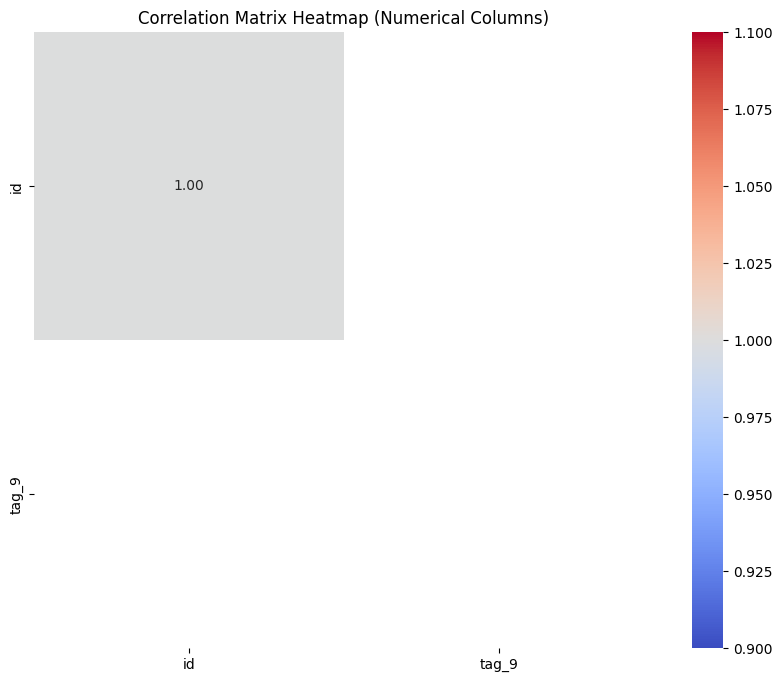

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Numerical Columns)')
plt.show()

In [22]:
df.index


RangeIndex(start=0, stop=600, step=1)

In [23]:
pip install datasets

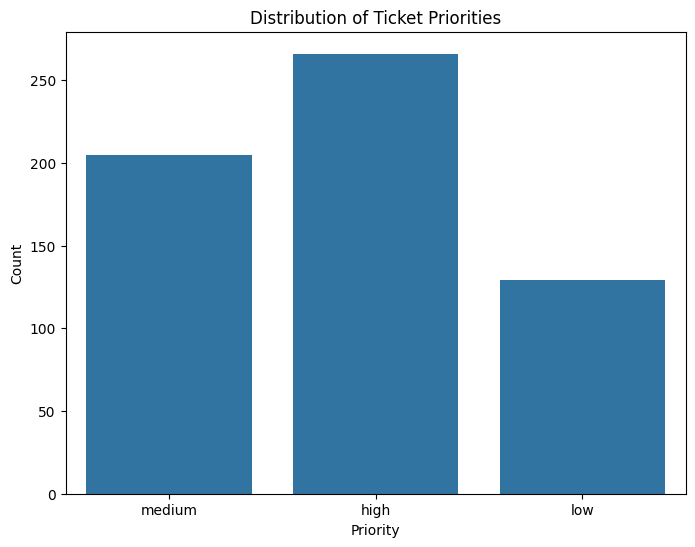

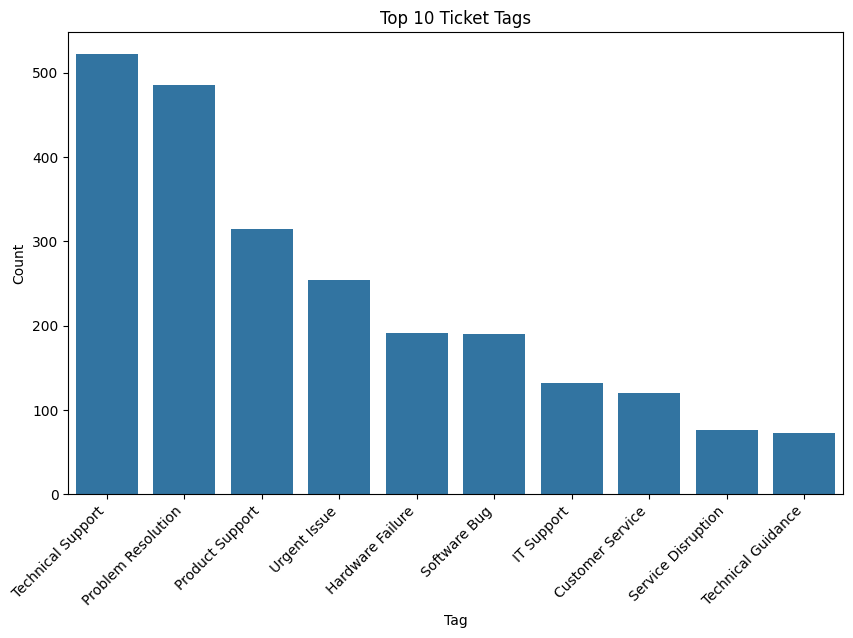

In [32]:
# prompt: analysis insight of the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Analyze the distribution of ticket priorities
plt.figure(figsize=(8, 6))
sns.countplot(x='priority', data=df)
plt.title('Distribution of Ticket Priorities')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

# Analyze the top tags associated with tickets
tag_counts = all_tags.value_counts().head(10)  # Get the top 10 tags
plt.figure(figsize=(10, 6))
sns.barplot(x=tag_counts.index, y=tag_counts.values)
plt.title('Top 10 Ticket Tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()



# https://huggingface.co/datasets/NebulaByte/E-Commerce_Customer_Support_Conversations

In [44]:
pip install datasets

In [51]:
from datasets import load_dataset
import pandas as pd

# Load the dataset
dataset = load_dataset("NebulaByte/E-Commerce_Customer_Support_Conversations", split="train")

# Convert to a Pandas DataFrame
df = pd.DataFrame(dataset)
df


,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi..."
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...
...,...,...,...,...,...,...,...,...,...,...,...
995,Cancellations and returns,Return and Exchange,Package open or tampered on delivery,Return and Exchange -> Package open or tampere...,negative,Electronics,Mobile,medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
996,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Men/Women/Kids,Backpack,medium,junior,"handles customer inquiries independently, poss...","Customer: Hi, I received an email from BrownBo..."
997,Warranty,Warranty Terms and Changes,Warranty mismatch between the website and the ...,Warranty Terms and Changes -> Warranty mismatc...,negative,Appliances,Water Purifier,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
998,Cancellations and returns,Return and Exchange,Checking the status of a refund,Return and Exchange -> Checking the status of ...,neutral,Appliances,Wet Grinder,medium,junior,"handles customer inquiries independently, poss...","Customer: Hi, I would like to check the status..."


In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   issue_area                   1000 non-null   object
 1   issue_category               1000 non-null   object
 2   issue_sub_category           1000 non-null   object
 3   issue_category_sub_category  1000 non-null   object
 4   customer_sentiment           1000 non-null   object
 5   product_category             1000 non-null   object
 6   product_sub_category         1000 non-null   object
 7   issue_complexity             1000 non-null   object
 8   agent_experience_level       1000 non-null   object
 9   agent_experience_level_desc  1000 non-null   object
 10  conversation                 1000 non-null   object
dtypes: object(11)
memory usage: 86.1+ KB
None


In [46]:
print(df.head())


                  issue_area                        issue_category  \
0          Login and Account  Mobile Number and Email Verification   
1  Cancellations and returns                   Pickup and Shipping   
2  Cancellations and returns        Replacement and Return Process   
3          Login and Account       Login Issues and Error Messages   
4                      Order                 Order Delivery Issues   

                                  issue_sub_category  \
0  Verification requirement for mobile number or ...   
1           Reasons for being asked to ship the item   
2             Inability to click the 'Cancel' button   
3  Error message regarding exceeded attempts to e...   
4                       Delivery not attempted again   

                         issue_category_sub_category customer_sentiment  \
0  Mobile Number and Email Verification -> Verifi...            neutral   
1  Pickup and Shipping -> Reasons for being asked...            neutral   
2  Replacement an

In [47]:
# Analyze common issues
issue_counts = df['issue_category'].value_counts()
print("\nCommon Issues:")
print(issue_counts)


Common Issues:
issue_category
Return and Exchange                                        95
Order Delivery Issues                                      91
Pickup and Shipping                                        66
Mobile Number and Email Verification                       59
Replacement and Return Process                             58
Returns and Refunds                                        37
Invoice and Payment                                        36
Pricing and Discounts                                      36
Order Confirmation and Status                              35
Lost or Missing Warranty Card                              32
Cash on Delivery (CoD) Refunds                             29
Product Installation                                       28
Return Checks and Fees                                     28
Account and Shopping                                       26
Login Methods                                              26
Adding and Changing Account Information

In [49]:
if 'sentiment' in df.columns:
    # Sentiment analysis distribution
    sentiment_counts = df['sentiment'].value_counts()
    print("\nSentiment Distribution:")
    print(sentiment_counts)

    # Example: Visualizing insights (requires matplotlib)
    import matplotlib.pyplot as plt

    # Plot sentiment distribution
    sentiment_counts.plot(kind='bar', title="Sentiment Distribution", color='skyblue')
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()
else:
    print("\n'sentiment' column not found in the DataFrame.")


'sentiment' column not found in the DataFrame.



Product Categories:
product_category
Appliances        465
Electronics       303
Men/Women/Kids    232
Name: count, dtype: int64


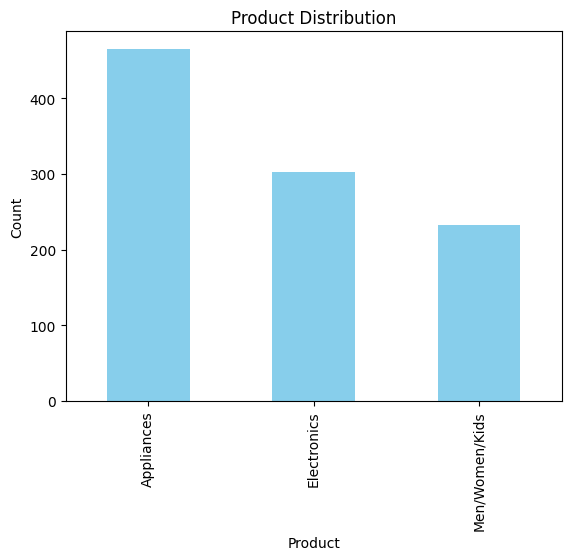

In [50]:
# Product categories distribution
product_counts = df['product_category'].value_counts()
print("\nProduct Categories:")
print(product_counts)


import matplotlib.pyplot as plt

product_counts.plot(kind='bar', title="Product Distribution", color='skyblue') # Call plot on product_counts
plt.xlabel("Product")
plt.ylabel("Count")
plt.show()

In [52]:
df.shape


(1000, 11)